<a href="https://colab.research.google.com/github/Idan-Alter/OU-20936-Data-Science-Workshop/blob/main/20936_X_2_CV_Tasks_with_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Workshop (20936)
## The Open University of Israel
### Department of Mathematics and Computer Science
####Idan Alter

### Unit X - ANN Applications with Hugging Face
#### Chapter 2 - Computer Vision Tasks

In [1]:
!pip install transformers datasets timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 30.4 MB/s 
     |████████████████████████████████| 441 kB 63.1 MB/s 
     |████████████████████████████████| 548 kB 69.3 MB/s 
     |████████████████████████████████| 163 kB 70.1 MB/s 
     |████████████████████████████████| 7.6 MB 47.5 MB/s 
     |████████████████████████████████| 212 kB 56.1 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 115 kB 53.5 MB/s 
     |████████████████████████████████| 127 kB 59.4 MB/s 
     |████████████████████████████████| 115 kB 65.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


#### Image Classification

In [2]:
from datasets import load_dataset
dataset = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

2
<class 'PIL.PngImagePlugin.PngImageFile'>


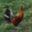

In [3]:
label = img=dataset["train"][5]["label"]
img   = dataset["train"][5]["img"]
print(label, type(img), sep="\n")
display(img)

In [4]:
labels=["airplane",   #0
       "automobile",  #1
       "bird",        #2
       "cat",         #3
       "deer",        #4
       "dog",         #5  
       "frog",        #6
       "horse",       #7
       "ship",        #8
       "truck"]       #9

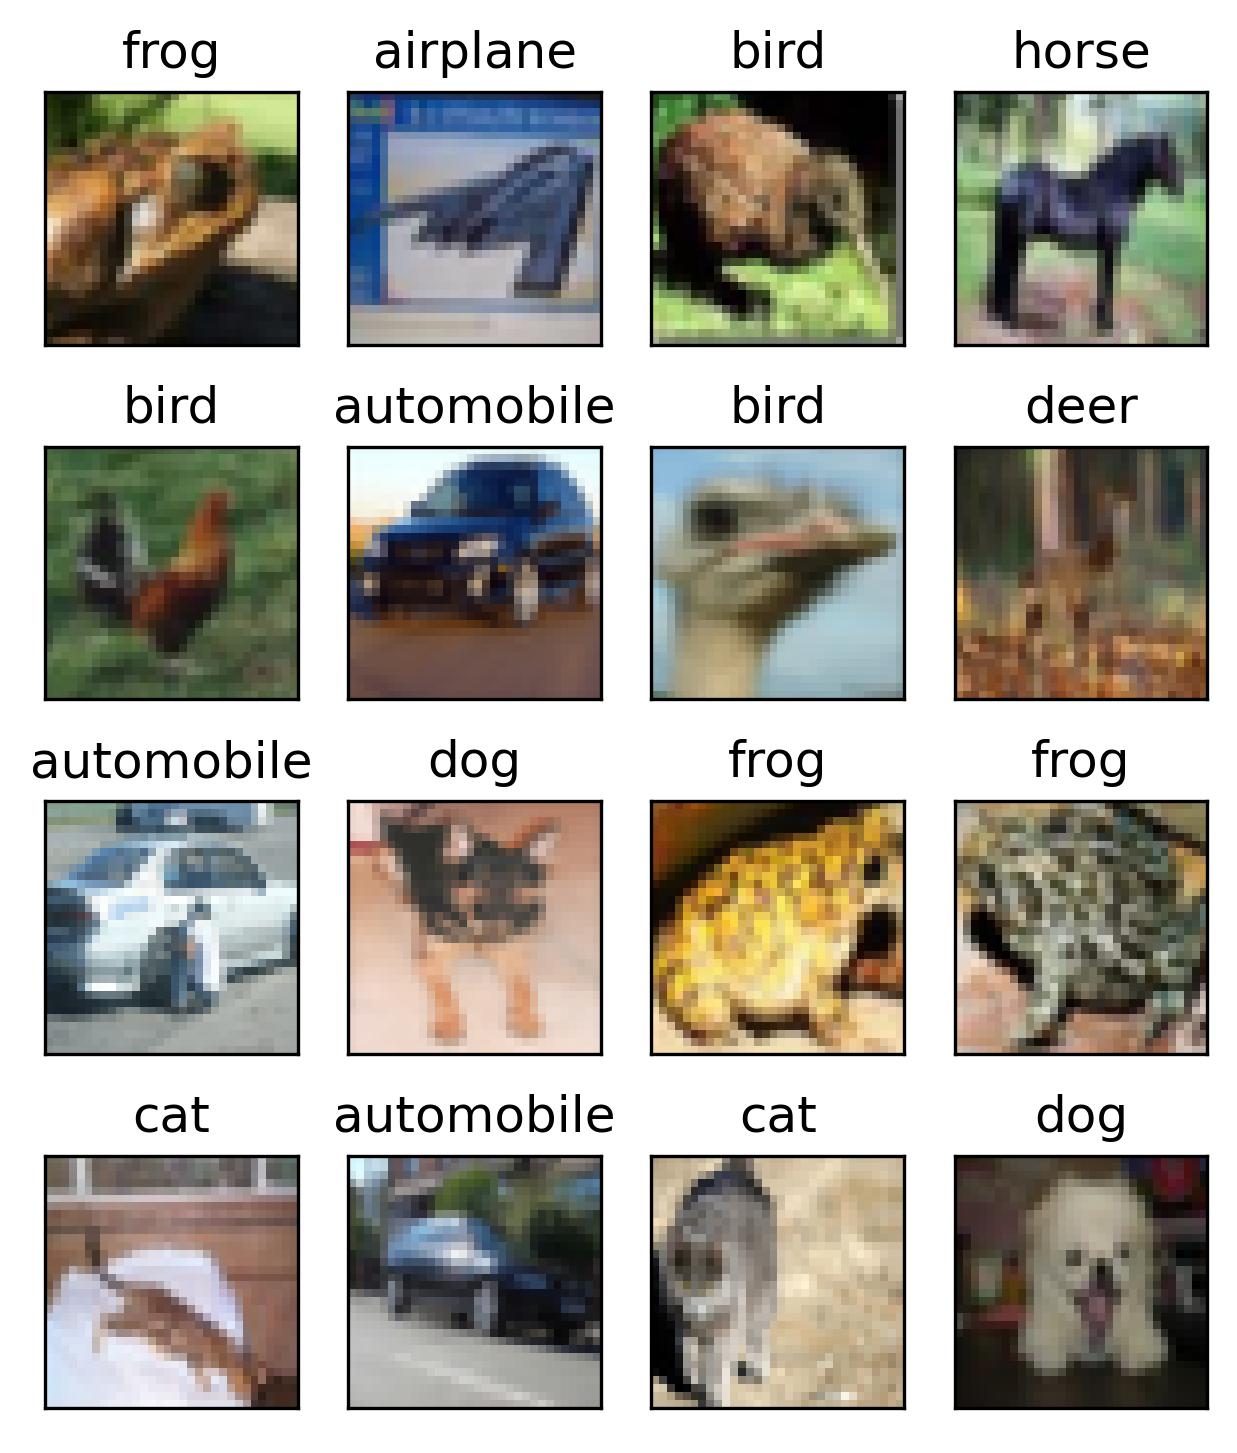

In [5]:
from matplotlib import pyplot as plt
nrows=4
ncols=4
fig,axes = plt.subplots(nrows, ncols, dpi=300)
fig.set_figheight(6)
fig.set_figwidth(5)
idx=0
for r in range(nrows):
  for c in range(ncols):
    idx=idx+1
    axes[r,c].imshow(dataset["train"][idx]["img"])
    axes[r,c].axes.get_xaxis().set_visible(False)
    axes[r,c].axes.get_yaxis().set_visible(False)
    label=dataset["train"][idx]["label"]
    axes[r,c].set_title(labels[label]);

In [6]:
from transformers import pipeline
classifier   = pipeline("image-classification")
result       = classifier(dataset["train"][0:2]["img"])
result

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

[[{'score': 0.988837718963623, 'label': 'airliner'},
  {'score': 0.000728944840375334, 'label': 'wing'},
  {'score': 0.0004527703276835382, 'label': 'speedboat'},
  {'score': 0.00039493461372330785, 'label': 'space shuttle'},
  {'score': 0.0003342161944601685, 'label': 'warplane, military plane'}],
 [{'score': 0.7123415470123291,
   'label': 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui'},
  {'score': 0.0383589044213295,
   'label': 'frilled lizard, Chlamydosaurus kingi'},
  {'score': 0.013003755360841751,
   'label': 'sidewinder, horned rattlesnake, Crotalus cerastes'},
  {'score': 0.011436142958700657, 'label': 'bullfrog, Rana catesbeiana'},
  {'score': 0.011071892455220222, 'label': 'gyromitra'}]]

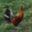

[{'score': 0.4888911843299866, 'label': 'cock'},
 {'score': 0.1984851062297821, 'label': 'hen'},
 {'score': 0.06721077114343643, 'label': 'partridge'},
 {'score': 0.031539998948574066, 'label': 'black grouse'},
 {'score': 0.017552586272358894,
  'label': 'fox squirrel, eastern fox squirrel, Sciurus niger'}]

In [7]:
img    = dataset["train"][5]["img"]
display(img)
result = classifier(img)
result

### Zero Shot Classification

In [8]:
classifier = pipeline("zero-shot-image-classification")

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision f4881ba (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [9]:
result = classifier(images=img, candidate_labels=labels)
result

[{'score': 0.9127656817436218, 'label': 'bird'},
 {'score': 0.025030262768268585, 'label': 'horse'},
 {'score': 0.0203132014721632, 'label': 'airplane'},
 {'score': 0.018579920753836632, 'label': 'dog'},
 {'score': 0.009067349135875702, 'label': 'deer'},
 {'score': 0.005255782511085272, 'label': 'frog'},
 {'score': 0.0035185785964131355, 'label': 'truck'},
 {'score': 0.002959963632747531, 'label': 'cat'},
 {'score': 0.001420338754542172, 'label': 'automobile'},
 {'score': 0.0010889284312725067, 'label': 'ship'}]

In [10]:
%%timeit -r1 -n1
samples = 500
matches = 0
for idx in range(samples):
  img    = dataset["train"][idx]["img"]
  result = classifier(images=img, candidate_labels=labels)
  predicted_label = result[0]["label"]
  true_label_num  = dataset["train"][idx]["label"]
  true_label      = labels[true_label_num]
  if true_label  == predicted_label:
    matches+=1
accuracy = matches/samples
print("\n",accuracy)


 0.896
18min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


##### On GPU

In [11]:
!nvidia-smi

Wed Nov  9 07:05:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
classifier = pipeline("zero-shot-image-classification",device = 0)

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision f4881ba (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
%%timeit -r1 -n1
samples=500
matches=0
for idx in range(samples):
  img    = dataset["train"][idx]["img"]
  result = classifier(images=img, candidate_labels=labels)
  predicted_label = result[0]["label"]
  true_label_num  = dataset["train"][idx]["label"]
  true_label      = labels[true_label_num]
  if true_label  == predicted_label:
    matches+=1
accuracy = matches/samples
print("\n",accuracy)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1046: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,



 0.896
1min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Object Detection

In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving COCO.jpg to COCO.jpg
User uploaded file "COCO.jpg" with length 140061 bytes


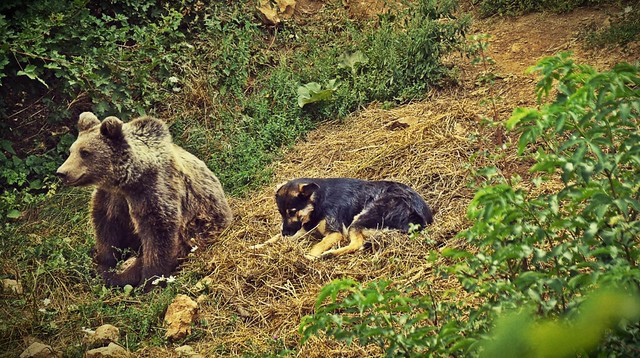

In [15]:
from PIL import Image
img = Image.open("COCO.jpg")
display(img)

In [16]:
detector = pipeline("object-detection")
result   = detector(img)
result

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Downloading:   0%|          | 0.00/274 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/detr/feature_extraction_detr.py:854: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  FutureWarning,


[{'score': 0.9985318183898926,
  'label': 'bear',
  'box': {'xmin': 53, 'ymin': 110, 'xmax': 232, 'ymax': 292}},
 {'score': 0.9928876757621765,
  'label': 'dog',
  'box': {'xmin': 274, 'ymin': 178, 'xmax': 434, 'ymax': 259}}]

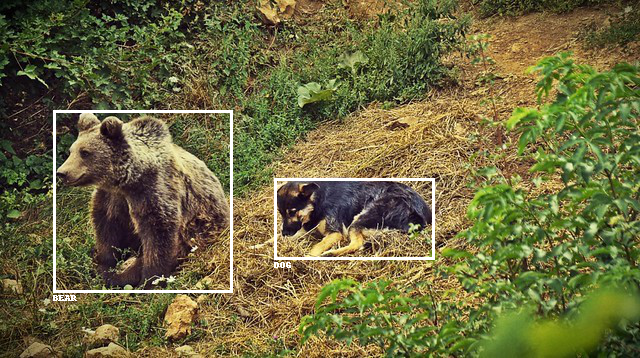

In [17]:
from PIL import ImageDraw
d = ImageDraw.Draw(img)
for idx in range(len(result)):
  box = result[idx]["box"]
  xy  = (box["xmin"], box["ymin"], box["xmax"], box["ymax"]) 
  d.rectangle(xy=xy, fill=None, outline="white", width=3)

  label = result[idx]["label"].upper()
  d.text(xy=(box["xmin"],box["ymax"]), text=label,fill="white")
display(img)

#### Semantic Segmentation

In [18]:
img     = Image.open("COCO.jpg")
segment = pipeline("image-segmentation")
result  = segment(img)
result

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/172M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/273 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/detr/feature_extraction_detr.py:1344: UserWarning: `label_ids_to_fuse` unset. No instance will be fused.
  warnings.warn("`label_ids_to_fuse` unset. No instance will be fused.")


[{'score': 0.964543,
  'label': 'LABEL_193',
  'mask': <PIL.Image.Image image mode=L size=640x358 at 0x7F722BC3FA10>},
 {'score': 0.966071,
  'label': 'LABEL_198',
  'mask': <PIL.Image.Image image mode=L size=640x358 at 0x7F722BBE5B50>},
 {'score': 0.999484,
  'label': 'dog',
  'mask': <PIL.Image.Image image mode=L size=640x358 at 0x7F720A8CF2D0>},
 {'score': 0.999699,
  'label': 'bear',
  'mask': <PIL.Image.Image image mode=L size=640x358 at 0x7F720A8CF3D0>}]

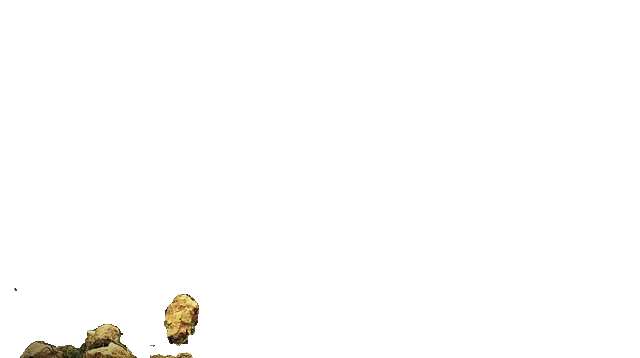

In [19]:
mask = result[1]["mask"]
img.putalpha(mask)
display(img)